<a href="https://colab.research.google.com/github/kmouts/PPS_PatternRecognition/blob/main/Naive_Bayes_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Σε αυτό το εργαστήριο θα δουλέψουμε τον αλγόριθμο **Naive Bayes**, συμπεριλαμβανομένου του τρόπου λειτουργίας του και του τρόπου υλοποίησής του από το μηδέν στη Python (χωρίς βιβλιοθήκες).

# Εισαγωγή
Σε αυτή την ενότητα βλέπουμε μια σύντομη επισκόπηση του αλγορίθμου Naive Bayes και των δεδομένων "Iris Flowers" που θα χρησιμοποιήσουμε.



## Naive Bayes

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" alt="Bayes" width="50%"/> 
</center>

Το Θεώρημα του Bayes παρέχει έναν τρόπο για να υπολογίσουμε την πιθανότητα κάποιων δεδομένων να ανήκουν σε μια κλάση, δεδομένης κάποιας προηγούμενης γνώσης μας:

> P (class|data) = (P(data|class) * P (class)) / P(data)

Όπου P (class|data) είναι η πιθανότητα της κλάσης με βάση τα δεδομένα (εκ των υστέρων πιθανότητα).

Ο Naive Bayes είναι ένας αλγόριθμος ταξινόμησης για προβλήματα δύο ή και περισσότερων κλάσεων. Ονομάζεται Naive Bayes επειδή οι υπολογισμοί των πιθανοτήτων για κάθε κλάση απλοποιούνται.

Αντί να προσπαθήσουμε να υπολογίσουμε τις πιθανότητες για κάθε παράμετρο, υποθέτουμε ότι είναι υπό συνθήκη ανεξάρτητες, δεδομένης της κλάσης.

Αυτή είναι μια πολύ ισχυρή υπόθεση που δεν συμβαίνει σχεδόν ποτέ σε πραγματικά δεδομένα, δηλαδή ότι οι παράμετροι δεν αλληλεπιδρούν. Ωστόσο, η προσέγγιση αποδίδει εκπληκτικά καλά ακόμη και σε δεδομένα όπου η υπόθεση δεν ισχύει.

## Δεδομένα ειδών λουλουδιών της Iris

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Iris_%28plant%29.jpg/300px-Iris_%28plant%29.jpg" alt="IRIS" width="20%"/> 
</center>

θα χρησιμοποιήσουμε τα δεδομένα με τα χαρακτηριστικά **τριών** ειδών λουλουδιών τύπου Iris.

Το σύνολο δεδομένων περιλαμβάνει το είδος της Ίριδας, και κάποια χαρακτηριστικά του λουλουδιού.

Πρόκειται για ένα πρόβλημα ταξινόμησης πολλαπλών κλάσεων. Ο αριθμός των παρατηρήσεων για κάθε κλάση είναι ίσος. Υπάρχουν 150 παρατηρήσεις με 4 μεταβλητές εισόδου (χαρακτηριστικά) και 1 μεταβλητή εξόδου. Τα ονόματα των μεταβλητών έχουν ως εξής:

*   Sepal length (σε cm).
*   Sepal width (σε cm).
*   Petal length (σε cm).
*   Petal width (σε cm).
*   Κλάση

Παρακάτω παρατίθεται ένα δείγμα των 5 πρώτων σειρών.

```
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

Η βασική ακρίβεια του προβλήματος είναι περίπου 33%.

Κατεβάστε το σύνολο δεδομένων και αποθηκεύστε το με όνομα iris.csv .

*  [Λήψη συνόλου δεδομένων (iris.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv)
*   [Περισσότερες πληροφορίες για το σύνολο δεδομένων (iris.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.names)

# Naive Bayes Tutorial (σε 5 εύκολα βήματα)
Σε αυτήν την ενότητα θα αναπτύξουμε κάθε κομμάτι του αλγορίθμου με χρήση ενός **toy-dataset** και στην επόμενη ενότητα θα συνδέσουμε όλα τα τμήματα με εφαρμογή στο πραγματικό σύνολο δεδομένων (το iris).

Θα χωρίσουμε τον αλγόριθμο Naive Bayes σε 5 μέρη:

*  Βήμα 1: Διαχωρισμός ανά κλάση.
*  Βήμα 2: Σύνοψη δεδομένων.
*  Βήμα 3: Σύνοψη δεδομένων ανά κλάση.
*  Βήμα 4: Συνάρτηση πυκνότητας πιθανότητας (pdf) Gauss.
*  Βήμα 5: Πιθανότητες κλάσης.

Αυτά τα βήματα παρέχουν τη βάση που χρειαζόμαστε για να εφαρμόσουμε τον Naive Bayes από την αρχή.

<small> **Σημείωση** : Δουλεύουμε εδώ με Python 3. Για Python 2.7, αλλάζουμε όλες τις κλήσεις items() των dictionary objects, σε iteritems(). </small>

## Βήμα 1: Διαχωρισμός ανά κλάση
Θα πρέπει να υπολογίσουμε την πιθανότητα των δεδομένων σύμφωνα με την κατηγορία στην οποία ανήκουν (base rate).

Αυτό σημαίνει ότι θα διαχωρίσουμε τα δεδομένα εκπαίδευσης ανά κλάση. Μια σχετικά απλή λειτουργία.

Μπορούμε να δημιουργήσουμε ένα λεξικό (dictionary) όπου κάθε κλειδί (key) είναι η τιμή κλάσης και στη συνέχεια να προσθέσουμε μια λίστα με όλες τις εγγραφές ως τιμή (value).

Ακολουθεί η συνάρτηση `separate_by_class()` που εφαρμόζει αυτήν την προσέγγιση. Υποθέτει ότι η τελευταία στήλη σε κάθε σειρά είναι η τιμή της κλάσης.




In [ ]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

Ας δημιουργήσουμε τώρα ένα μικρό σύνολο δεδομένων (**toy-dataset**) για να δοκιμάσουμε αυτήν τη συνάρτηση:

In [ ]:
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]

Μπορούμε να απεικονίσουμε αυτά τα δεδομένα και να χρησιμοποιήσουμε ξεχωριστά χρώματα για κάθε κλάση:
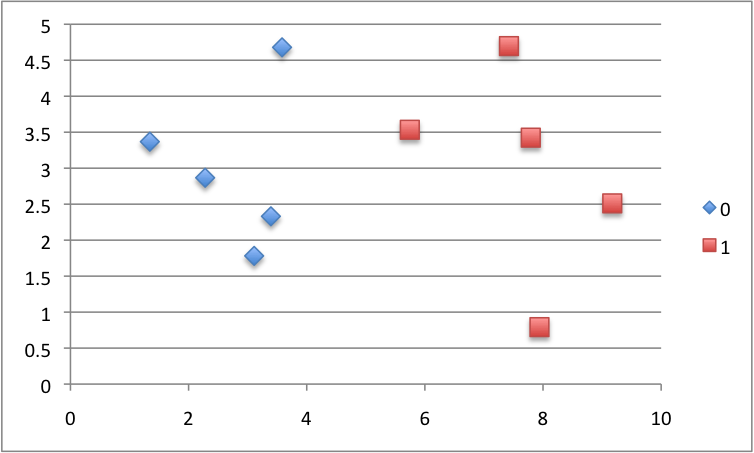

Συγκεντρώνοντας όλα αυτά, μπορούμε να δοκιμάσουμε τη λειτουργία της συνάρτησης `separate_by_class()` στο σύνολο δεδομένων:

In [ ]:
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

Η εκτέλεση του παραδείγματος ταξινομεί το σύνολο δεδομένων βάσει της τιμής κλάσης και μετά εκτυπώνει την τιμή κλάσης ακολουθούμενη από όλες τις σχετικές εγγραφές.

Στη συνέχεια ας ξεκινήσουμε να αναπτύσσουμε τις συναρτήσεις για τη συλλογή στατιστικών.

## Βήμα 2: Σύνοψη δεδομένων
Χρειαζόμαστε δύο στατιστικές τιμές από τα δεδομένα: τον **μέσο όρο** και τη **τυπική απόκλιση**.

Ο μέσος όρος είναι η μέση τιμή και μπορεί να υπολογιστεί ως:

*   ```mean = sum(x)/count(x)```
Όπου x είναι η λίστα τιμών ή μια στήλη που αναζητούμε.

Ακολουθεί μια μικρή συνάρτηση που ονομάζεται `mean()` που υπολογίζει το μέσο όρο μιας λίστας αριθμών.

In [ ]:
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

Η τυπική απόκλιση δείγματος υπολογίζεται ως η μέση διαφορά από τη μέση τιμή. Αυτό μπορεί να υπολογιστεί ως:


*   ```standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)```

Δηλ. τετραγωνίζουμε τη διαφορά μεταξύ του μέσου και μιας δεδομένης τιμής, υπολογίζουμε τη μέση τετραγωνική διαφορά από τη μέση τιμή και, στη συνέχεια, παίρνουμε την τετραγωνική ρίζα για να επιστρέψουμε τις μονάδες στην αρχική τους τιμή.

Ακολουθεί μια μικρή συνάρτηση που ονομάζεται `stdev()` που υπολογίζει την τυπική απόκλιση μιας λίστας αριθμών. Θα παρατηρήσετε ότι υπολογίζει το μέσο όρο. Μπορεί να είναι πιο αποτελεσματικό να υπολογίσετε τη μέση τιμή μιας λίστας αριθμών μία φορά και να τη μεταβιβάσετε στη συνάρτηση `standard_deviation()` ως παράμετρο. Μπορείτε αργότερα να εξερευνήσετε αυτήν τη βελτιστοποίηση εάν σας ενδιαφέρει.




In [ ]:
from math import sqrt
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

Θέλουμε να υπολογίζεται η μέση τιμή και η τυπική απόκλιση για κάθε μεταβλητή (δηλ για κάθε στήλη των δεδομένων μας).

Θα το κάνουμε συγκεντρώνοντας όλες τις τιμές για κάθε στήλη σε μια λίστα και υπολογίζοντας τη μέση και τυπική απόκλιση στη λίστα αυτή. Έπειτα, συλλέγουμε τα στατιστικά στοιχεία σε μια λίστα ή σε ένα tuple στατιστικών. Στη συνέχεια, επαναλαμβάνουμε αυτήν τη διαδικασία σε κάθε στήλη των δεδομένων και επιστρέφουμε μια λίστα με tuples στατιστικών.

Ακολουθεί η συνάρτηση `summarize_dataset()` που εφαρμόζει αυτήν την προσέγγιση. Χρησιμοποιεί μερικά κόλπα της Python (όπως την συνάρτηση [zip()](https://docs.python.org/3.3/library/functions.html#zip)) για να συντομεύσει τον κώδικα.

In [ ]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

Το πρώτο κόλπο είναι η χρήση της συνάρτησης `zip()` που θα συγκεντρώνει στοιχεία από κάθε παρεχόμενο όρισμα. Περνάμε το σύνολο δεδομένων στη συνάρτηση `zip()` με τον τελεστή `*` που διαχωρίζει το σύνολο δεδομένων (δηλαδή μια λίστα λιστών) σε ξεχωριστές λίστες για κάθε σειρά. H συνάρτηση `zip()` επαναλαμβάνει κάθε στοιχείο κάθε σειράς και επιστρέφει μια στήλη από το σύνολο δεδομένων ως λίστα αριθμών.

Στη συνέχεια υπολογίζουμε τη μέση, τυπική απόκλιση και τον αριθμό των σειρών σε κάθε στήλη. Δημιουργείται μια πλειάδα (tuple) από αυτούς τους 3 αριθμούς και αποθηκεύεται μια λίστα με αυτές τις πλειάδες. Στη συνέχεια καταργούμε τα στατιστικά στοιχεία για τη μεταβλητή κλάσης, καθώς δεν χρειαζόμαστε αυτό το στατιστικό.

Ας δοκιμάσουμε όλες αυτές τις λειτουργίες στο toy-dataset:

In [ ]:
summary = summarize_dataset(dataset)
print(summary)

Η εκτέλεση του παραδείγματος εκτυπώνει τη λίστα των πλειάδων στατιστικών στοιχείων σε καθεμία από τις δύο μεταβλητές εισόδου.

Μπορούμε να δούμε ότι η μέση τιμή του X1 είναι 5.178333386499999 και η τυπική απόκλιση του X1 είναι 2,7665845055177263.

Eίμαστε έτοιμοι να χρησιμοποιήσουμε αυτές τις συναρτήσεις σε κάθε ομάδα σειρών στα δεδομένα μας.

## Βήμα 3: Σύνοψη δεδομένων ανά κλάση
Τώρα χρειαζόμαστε και τα στατιστικά στοιχεία από τα δεδομένα εκπαίδευσης *ανά κλάση*.

Έχουμε ήδη αναπτύξει τη συνάρτηση `separate_by_class()` για να διαχωρίσουμε τα δεδομένα σε σειρές ανά κλάση. Και έχουμε αναπτύξει τη συνάρτηση `summarize_dataset()` για τον υπολογισμό των συνοπτικών στατιστικών για κάθε στήλη.

Μπορούμε να τα συνδυάσουμε για να συνοψίσουμε τις στήλες στο σύνολο δεδομένων ανά κλάση.

Ακολουθεί η συνάρτηση `summarize_by_class()`. Τα δεδομένα διαιρούνται πρώτα ανά κλάση και, στη συνέχεια, τα στατιστικά στοιχεία υπολογίζονται σε κάθε υποσύνολο. Τα αποτελέσματα με τη μορφή μιας λίστας πλειάδων στατιστικών αποθηκεύονται σε ένα λεξικό (dictionary) με κλειδί την τιμή της κάθε κλάσης.

In [ ]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

Και πάλι, ας δοκιμάσουμε αυτές τις συναρτήσεις στο δοκιμαστικό σύνολο δεδομένων:

In [ ]:
summary = summarize_by_class(dataset)
for label in summary:
	print(label)
	for row in summary[label]:
		print(row)

Η εκτέλεση αυτού του παραδείγματος υπολογίζει τα στατιστικά στοιχεία για κάθε μεταβλητή εισόδου (δηλ. στήλη) και τα εκτυπώνει οργανωμένα ανά τιμή κλάσης. Στα αποτελέσματα, βλέπουμε πχ. ότι οι τιμές της μεταβλητής X1 για την κλάση 0 έχουν μέση τιμή: 2.7420144012.

Μένει ακόμη ένα βήμα πριν αρχίσουμε να υπολογίζουμε τις πιθανότητες.

## Βήμα 4: Συνάρτηση πυκνότητας πιθανότητας (pdf) Gauss
Ο υπολογισμός της πιθανότητας ή πιθανοφάνειας (**likelihood**) μιας πραγματικής τιμής (πχ της μεταβλητής X1) είναι δύσκολος.

Ένας τρόπος που μπορούμε να το κάνουμε είναι να υποθέσουμε ότι οι τιμές της X1 **προέρχονται από μια (γνωστή) κατανομή**, όπως πχ. η κανονική/Gaussian κατανομή:
<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40" alt="Normal distribution" width="50%"/> 
</center>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1280px-Standard_deviation_diagram_micro.svg.png" alt="Normal curve" width="80%"/> 
</center>



Μια κατανομή Gauss μπορεί να περιγραφεί χρησιμοποιώντας μόνο δύο αριθμούς: τη μέση τιμή και την τυπική απόκλιση. Επομένως, με λίγα μαθηματικά, μπορούμε να εκτιμήσουμε την πιθανότητα μιας δεδομένης τιμής. Ονομάζεται συνάρτηση κατανομής πιθανότητας Gauss (ή Gaussian PDF) και μπορεί να υπολογιστεί ως:

*  f(x)=(1 / sqrt(2*PI) * sigma) * exp(-((x-mean)^2/(2*sigma^2)))

Όπου το sigma  είναι η τυπική απόκλιση για το x, mean είναι ο μέσος όρος για το x και το PI είναι η τιμή του `π`.

Παρακάτω έχουμε μια συνάρτηση που την υλοποιεί:

In [ ]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

Ας τη δοκιμάσουμε για να δούμε πώς λειτουργεί. Παρακάτω βλέπουμε μερικά παραδείγματα:

In [ ]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

Η παραπάνω εκτέλεση εκτυπώνει την πιθανότητα ορισμένων τιμών εισόδου. Μπορείτε να δείτε ότι όταν η τιμή είναι 1 και η μέση και τυπική απόκλιση είναι 1, η είσοδος μας είναι η πιο πιθανή (κορυφή στην καμπάνα) και έχει την πιθανότητα 0,39.

Επίσης βλέπουμε ότι όταν διατηρούμε ίδια στατιστικά και αλλάζουμε την τιμή του x κατά μία τυπική απόκλιση και από τις δύο πλευρές της μέσης τιμής (2 και 0 ή στην ίδια απόσταση και στις δύο πλευρές της καμπάνας) οι πιθανότητες αυτών των τιμών εισαγωγής είναι ίδιες στα 0.24.

Μπορούμε να υπολογίσουμε στο παράδειγμα αυτό, ποιά είναι η πιθανότητα να έχουμε μια τιμή που είναι 3 τυπικές αποκλίσεις μακρύτερα από τον μέσο όρο;



In [ ]:
# Βάλτε τον κώδικά σας εδώ



Τώρα που έχουμε όλα τα κομμάτια στη θέση τους, ας δούμε πώς μπορούμε να υπολογίσουμε τις πιθανότητες που χρειαζόμαστε για τον ταξινομητή Naive Bayes.

## Βήμα 5: Πιθανότητες κλάσης
Τώρα μπορούμε να χρησιμοποιήσουμε τα στατιστικά στοιχεία που υπολογίστηκαν από τα δεδομένα εκπαίδευσης για να υπολογίσουμε τις πιθανότητες για νέα δεδομένα.

Οι πιθανότητες υπολογίζονται ξεχωριστά για κάθε κλάση. Αυτό σημαίνει ότι υπολογίζουμε πρώτα την πιθανότητα για ένα νέο στοιχείο δεδομένων να ανήκει στην πρώτη κλάση, μετά τη πιθανότητα να ανήκει στη δεύτερη κλάση και ούτω καθεξής για όλες τις κλάσεις.

Η πιθανότητα ότι ένα στοιχείο δεδομένων ανήκει σε μια κλάση υπολογίζεται ως εξής:

*   `P(class|data) = P(X|class) * P(class)`

Μπορεί να παρατηρήσετε ότι αυτό είναι κάπως διαφορετικό από το θεώρημα Bayes που περιγράψαμε παραπάνω.

Η διαίρεση έχει αφαιρεθεί για να απλοποιηθεί ο υπολογισμός.

Αυτό σημαίνει ότι το αποτέλεσμα δεν είναι πλέον αυστηρά η πιθανότητα των δεδομένων που ανήκουν σε μια κλάση. Η τιμή εξακολουθεί να μεγιστοποιείται, πράγμα που σημαίνει ότι ο υπολογισμός για την κλάση που οδηγεί στη μεγαλύτερη τιμή λαμβάνεται ως πρόβλεψη. Αυτή είναι μια συνηθισμένη απλοποίηση στην υλοποίηση, καθώς συχνά ενδιαφερόμαστε περισσότερο για την πρόβλεψη κλάσης παρά για την πιθανότητα.

Οι μεταβλητές αντιμετωπίζονται ξεχωριστά, δίνοντας στην μέθοδο το όνομά της "naive - αφελής". Για το παραπάνω παράδειγμα όπου έχουμε 2 μεταβλητές , ο υπολογισμός της πιθανότητας ότι μια σειρά ανήκει στην πρώτη κλάση 0 μπορεί να υπολογιστεί ως:

*  `P(class=0|X1,X2) = P(X1|class=0) * P(X2|class=0) * P(class=0)`

Τώρα βλέπουμε γιατί πρέπει να διαχωρίσουμε τα δεδομένα ανά κλάση. Η συνάρτηση Gaussian Probability Density στο προηγούμενο βήμα υπολογίζει την πιθανότητα μιας πραγματικής τιμής (πχ για το X1), χρησιμοποιώντας τα στατιστικά που ετοιμάσαμε προηγουμένως.

Ακολουθεί η συνάρτηση `calculate_class_probabilities()` που τα συνδέει όλα αυτά μαζί.

Ως όρισμα στην συνάρτηση θα δίνουμε τα έτοιμα στατιστικά και μια νέα γραμμή με δεδομένα, για να υπολογιστεί το αποτέλεσμα για κάθε δυνατή κλάση.

Πρώτα, υπολογίζεται ο συνολικός αριθμός των εγγραφών εκπαίδευσης από τις μετρήσεις που βρίσκονται στα συνοπτικά στατιστικά στοιχεία. Αυτό χρησιμοποιείται για τον υπολογισμό της πιθανότητας μιας δεδομένης κλάσης (prior) ή `P(class)` ως ο λόγος των σειρών με μια δεδομένη κλάση προς το πλήθος όλων των σειρών στα δεδομένα εκπαίδευσης.

Στη συνέχεια, υπολογίζονται οι πιθανότητες για κάθε τιμή εισόδου στη σειρά χρησιμοποιώντας τη συνάρτηση πυκνότητας πιθανότητας Gauss και τα στατιστικά στοιχεία για αυτήν τη στήλη και αυτής της κλάσης. Οι πιθανότητες πολλαπλασιάζονται μαζί καθώς συσσωρεύονται.

Αυτή η διαδικασία επαναλαμβάνεται για κάθε κλάση στο σύνολο δεδομένων.

Τέλος επιστρέφεται ένα λεξικό "πιθανότητας" με μία καταχώρηση για κάθε κλάση.

In [ ]:
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

Ας το συνδέσουμε μαζί με ένα παράδειγμα στο toy-dataset.

Το παρακάτω παράδειγμα  χρησιμοποιεί τα στατιστικά στοιχεία που έχουμε ήδη βρει, για να υπολογίσει την πιθανότητα της πρώτης εγγραφής που ανήκει σε κάθε κλάση.

In [ ]:
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

Η εκτέλεση του παραδείγματος εκτυπώνει τις πιθανότητες που υπολογίζονται για κάθε κλάση.

Μπορούμε να δούμε ότι η πιθανότητα της πρώτης σειράς να ανήκει στην κλάση 0 (0,0503) είναι μεγαλύτερη από την πιθανότητα να ανήκει στην κατηγορία 1 (0,0001). Επομένως, καταλήγουμε σωστά στο συμπέρασμα ότι ανήκει στην κλάση 0.


Δοκιμάστε την συνάρτηση `calculate_class_probabilities` με μια δική σας γραμμή δεδομένων (που δεν υπάρχει δηλ, στα δεδομένα εκπαίδευσης του toy_dataset). Είναι αναμενόμενο το αποτέλεσμα σε σχέση και με την απεικόνιση των δεδομένων στο toy_dataset;

In [ ]:
# Βάλτε τον κώδικά σας εδώ




Τώρα που έχουμε δει πώς δουλεύει ο αλγόριθμος Naive Bayes, ας τον εφαρμόσουμε στο σύνολο δεδομένων λουλουδιών Iris.

# Μελέτη περίπτωσης ειδών λουλουδιών Iris
Σε αυτή την ενότητα εφαρμόζουμε τον αλγόριθμο Naive Bayes στο σύνολο δεδομένων Iris.

Το πρώτο βήμα είναι να διαβάσουμε τα δεδομένα και να τα μετατρέψουμε σε αριθμούς ώστε να χρησιμοποιηθούν στους υπολογισμούς μέσης τιμής και τυπικής απόκλισης. Για αυτό θα χρησιμοποιήσουμε τη βοηθητική συνάρτηση pandas: 
`read_csv` για να φορτώσουμε το αρχείο, και `make_dataset` για να το μετατρέψουμε σε λίστες δεδομένων. Ακόμη, χρησιμοποιούμε την  `str_column_to_int()` για να μετατρέψουμε τη στήλη κλάσης σε ακέραιες τιμές.

Θα αξιολογήσουμε τον αλγόριθμο χρησιμοποιώντας **k-fold cross-validation** με 5 πτυχές. Αυτό σημαίνει ότι 150/5 = 30 εγγραφές θα είναι σε κάθε πτυχή. Θα χρησιμοποιήσουμε τις βοηθητικές συναρτήσεις `evaluate_algorithm()` για να αξιολογήσουμε τον αλγόριθμο και `accuracy_metric()` για να υπολογίσουμε την ακρίβεια των προβλέψεων.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/512px-K-fold_cross_validation_EN.svg.png" alt="Cross Validation" width="60%"/> 
</center>

Έχουμε και μια νέα συνάρτηση με την ονομασία `predict()` για τη διαχείριση υπολογισμού των πιθανοτήτων μιας νέας γραμμής και την επιλογή της κλάσης με τη μεγαλύτερη τιμή πιθανότητας.

Μια άλλη  συνάρτηση: `naive_bayes()` αναπτύχθηκε για τη διαχείριση της εφαρμογής του αλγορίθμου Naive Bayes, μαθαίνοντας πρώτα τα στατιστικά από ένα σύνολο δεδομένων εκπαίδευσης και χρησιμοποιώντας τα για να κάνουν προβλέψεις.

In [ ]:
import pandas as pd
url_to_the_file  = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_dataset = pd.read_csv(url_to_the_file, header = None)

In [ ]:
iris_dataset.head()

In [ ]:

def make_dataset(iris_data):
  dataset = list()
  for rows in iris_data.itertuples(): 
    # Create list for the current row 
    my_list =[rows[1], rows[2], rows[3],rows[4],rows[5]] 
    dataset.append(my_list)
  return dataset

In [ ]:
# Naive Bayes On The Iris Dataset
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
 

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)
 

In [ ]:
# Test Naive Bayes on Iris Dataset
seed(1)
dataset = make_dataset(iris_dataset)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Η εκτέλεση του παραδείγματος εκτυπώνει τη μέση βαθμολογία ακρίβειας ταξινόμησης για κάθε πτυχή των δεδομένων καθώς και τη μέση ακρίβεια.

Μπορούμε να δούμε ότι η μέση ακρίβεια περίπου 95% είναι δραματικά καλύτερη από την αρχική ακρίβεια 33%.

Μπορούμε επίσης να εκπαιδεύσουμε ένα μοντέλο σε ολόκληρο το σύνολο δεδομένων και στη συνέχεια να χρησιμοποιήσουμε το μοντέλο για να κάνουμε προβλέψεις σε νέες παρατηρήσεις:
```
# fit model
model = summarize_by_class(dataset)
```
Μόλις υπολογιστεί το μοντέλο, μπορούμε να το χρησιμοποιήσουμε με κλήση στη `predict()` με όρισμα μια σειρά που αντιπροσωπεύει τη νέα μας παρατήρηση και να προβλέψουμε την κλάση:
```
# predict the label
label = predict(model, row)
```
Παρατίθεται στη συνέχεια ένα πλήρες παράδειγμα προσαρμογής του μοντέλου Naive Bayes σε ολόκληρο το σύνολο δεδομένων και κάνοντας μία πρόβλεψη για μια νέα παρατήρηση:




In [ ]:
# Make a prediction with Naive Bayes on Iris Dataset
filename = 'iris.csv'
dataset = make_dataset(iris_dataset)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

To παραπάνω αποτέλεσμα μας τυπώνει την πιο πιθανή κλάση, αλλά δεν μας πληροφορεί τις "πιθανότητες" ανα κλάση, ώστε να εκτιμήσουμε την "βεβαιότητα" της πρόβλεψης. 

In [ ]:
# Predict the class for a given row with probabilities report
def predict_with_prob_report(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	# Προσθέστε τον κώδικά σας εδώ

	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label
label = predict_with_prob_report(model, row)
print('Data=%s, Predicted: %s' % (row, label))



---


### Επέκταση σε άλλα Datasets από το σκληρό μας δίσκο
Εκτός απο την δυνατότητα να φορτώνουμε on-Line δεδομένα, μέσω της βιβλιοθήκης pandas που χρηρισμοποιεί η παραπάνω εντολή `dataset = make_dataset(iris_dataset)`, μπορείτε να δημιουργήσετε μια δική σας συνάρτηση `load_csv(filename)` που να διαβάζει αρχεία csv από τον σκληρό σας δίσκο, και στη συνέχεια να τα μετατρέπει σε κατάλληλη μορφή (float, integers).